In [ ]:
#Name-Vipul Anand
#Batch-DS2312
#Assignment-web scraping 3

In [1]:
#Question-1 &2

In [1]:
import selenium
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.chrome.options import Options
import regex as re

In [2]:
chrome_options=Options()
chrome_options.add_argument('--incognito')

In [3]:
driver=webdriver.Chrome()
driver.get('https://www.amazon.in/')

In [4]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
product=input('enter the product you want to search')
search.send_keys(product)

enter the product you want to searchguitar


In [5]:
search_click= driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_click.click()

In [6]:
Name_of_the_product=[]
price=[]
Return=[]
expected_delivery=[]
availability=[]
product_url=[]

In [7]:
for i in range(0,3):
    product= driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in product:
        product_url.append(i.get_attribute('href'))
    next_button = driver.find_element(By.CLASS_NAME, "s-pagination-item.s-pagination-next.s-pagination-button.s-pagination-separator")
    next_button.click()
    time.sleep(2)
print(product_url,len(product_url))

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4ODI5MTIxNjQyNDg1MDQ3OjE3MDgxNTY2MTQ6c3BfYXRmOjMwMDAzMTMyOTU5MDczMjo6MDo6&url=%2FKadence-A281BK-Professional-Acoustic-Rosewood%2Fdp%2FB0CD7D6C6R%2Fref%3Dsr_1_1_sspa%3Fcrid%3D13Z6P5597I6KY%26dib%3DeyJ2IjoiMSJ9.crxhhcuVe8Gag3-0mnCXJk5gRGRjAn72t4-tOuogQR7DaKBpp_6zr1oSt6peKmoNBIs0r4EGYA49QwwONkRPQmqXDisIGsbGhX0lxUVr2zg3Wk0E20sULfH3t3mrrz6RLUpQlc6Yr2tptbmweogDOfLmusW5GWERxcj8_QWOnfAimH33LCHkHSLjMngi9qW05bIEjDFjB072bZxtIfaHglYiS0zx1dPoxkq90HEnKYctavVMjmVttdrIEcYHdpnFr8U8uYkLUUfIXsUP0BzE1nqVmUkwTp-vw_v4vBfS3J4.vSz1gmeZCDmytWkyQZflvXc2DJSdIMPrY0q4DtBv3h0%26dib_tag%3Dse%26keywords%3Dguitar%26qid%3D1708156614%26sprefix%3Dguitar%252Caps%252C252%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1', 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4ODI5MTIxNjQyNDg1MDQ3OjE3MDgxNTY2MTQ6c3BfYXRmOjMwMDAyMjkzODAyNjEzMjo6MDo6&url=%2FKadence-Professional-Acoustic-Rosewood-Natural%2Fdp%2FB0CC927DLN%2Fref%3Dsr_1_2_sspa%3Fcrid%3D13Z6P5597I6KY%26dib%

In [8]:
for i in product_url:
    driver.get(i)
    time.sleep(2)
    try:
        pricee=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[4]/div[13]/div/div/div[4]/div[1]/span[3]/span[2]/span[2]')
        price.append(pricee.text)
    except NoSuchElementException as e:
        price.append('-')
    try:
        returnn=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[4]/div[24]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/span')
        Return.append(returnn.text)
    except NoSuchElementException as e:
        Return.append('-')
    try:
        delivery=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[3]/div[10]/div[1]/div/div/div/span')
        expected_delivery.append(delivery.text)

    except NoSuchElementException as e:
        expected_delivery.append('-')
    try:
        stock= driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[5]/div/div[1]/span')
        availability.append(stock.text)
    except NoSuchElementException as e:
        availability.append('-')
    try:
        name=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[4]/div[1]/div/h1/span')
        Name_of_the_product.append(name.text)
    except NoSuchElementException as e:
        Name_of_the_product.append('-')

     
print(len(Name_of_the_product))
print(len(product_url))
print(len(price))
print(len(Return))
print(len(expected_delivery))
print(len(availability))

188
188
188
188
188
188


In [9]:
guitar_df= pd.DataFrame({'Name':Name_of_the_product,'Url':product_url,'price':price,'Return/Exchange':Return,'Expected_delivery':expected_delivery,'Availability':availability})

In [10]:
guitar_df

,Name,Url,price,Return/Exchange,Expected_delivery,Availability
0,Kadence A281BK Professional Acoustic Rosewood ...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"6,499",7 days Replacement,"FREE delivery Tuesday, 20 February. Order with...",In stock
1,Kadence A281 Professional Acoustic Rosewood gu...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"6,499",7 days Replacement,"FREE delivery Monday, 19 February. Details",In stock
2,Kadence Frontier guitar with Online Guitar lea...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"4,499",7 days Replacement,"FREE delivery Tuesday, 20 February. Order with...",In stock
3,"Kadence rosewood Guitar Frontier Series, Elect...",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"5,499",7 days Replacement,"FREE delivery Tuesday, 20 February. Order with...",In stock
4,"Intern INT-38C Right hand Acoustic Guitar Kit,...",https://www.amazon.in/Intern-INT-38C-Acoustic-...,"1,995",7 days Replacement,"FREE delivery Tuesday, 20 February. Order with...",In stock
...,...,...,...,...,...,...
183,"Acoustic Guitar, 39 Inch Cutaway, 039C with Ba...",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"4,996",-,"FREE delivery Tuesday, 20 February. Order with...",Only 1 left in stock.
184,"PS Signature 41inch RoseWood Acoustic Guitar, ...",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"3,899",-,"FREE delivery Thursday, 22 February. Order wit...",In stock
185,PS Signature 41inch Acoustic Guitar New Model ...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"3,699",-,"FREE delivery Thursday, 22 February. Order wit...",In stock
186,ROCKON RA-40 BLUE ACOUSTIC GUITAR 40 INCHES WI...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"8,999",-,"₹99 delivery Wednesday, 21 February. Details",Only 2 left in stock.


In [11]:
guitar_csv= guitar_df.to_csv(index=False)
print(guitar_csv)

Name,Url,price,Return/Exchange,Expected_delivery,Availability
Kadence A281BK Professional Acoustic Rosewood Guitar (Black),https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4ODI5MTIxNjQyNDg1MDQ3OjE3MDgxNTY2MTQ6c3BfYXRmOjMwMDAzMTMyOTU5MDczMjo6MDo6&url=%2FKadence-A281BK-Professional-Acoustic-Rosewood%2Fdp%2FB0CD7D6C6R%2Fref%3Dsr_1_1_sspa%3Fcrid%3D13Z6P5597I6KY%26dib%3DeyJ2IjoiMSJ9.crxhhcuVe8Gag3-0mnCXJk5gRGRjAn72t4-tOuogQR7DaKBpp_6zr1oSt6peKmoNBIs0r4EGYA49QwwONkRPQmqXDisIGsbGhX0lxUVr2zg3Wk0E20sULfH3t3mrrz6RLUpQlc6Yr2tptbmweogDOfLmusW5GWERxcj8_QWOnfAimH33LCHkHSLjMngi9qW05bIEjDFjB072bZxtIfaHglYiS0zx1dPoxkq90HEnKYctavVMjmVttdrIEcYHdpnFr8U8uYkLUUfIXsUP0BzE1nqVmUkwTp-vw_v4vBfS3J4.vSz1gmeZCDmytWkyQZflvXc2DJSdIMPrY0q4DtBv3h0%26dib_tag%3Dse%26keywords%3Dguitar%26qid%3D1708156614%26sprefix%3Dguitar%252Caps%252C252%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1,"6,499",7 days Replacement,"FREE delivery Tuesday, 20 February. Order within 7 hrs 47 mins. Details",In stock
"Kadence A281 P

In [101]:
#Question-3

In [103]:
driver=webdriver.Chrome()
driver.get('https://images.google.com/')

In [106]:
search_text= driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')

In [107]:
search_text.send_keys('fruits')

In [108]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search.click()


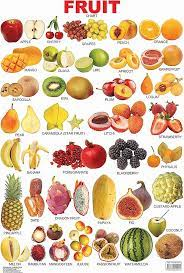


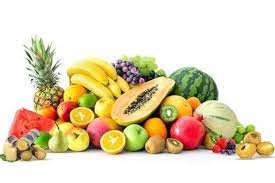


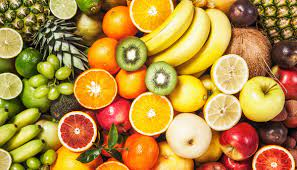


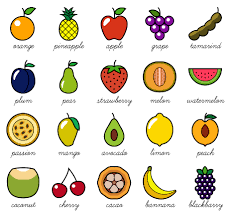


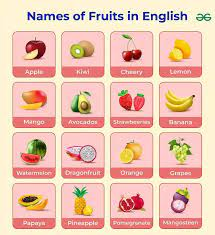


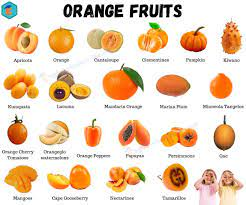


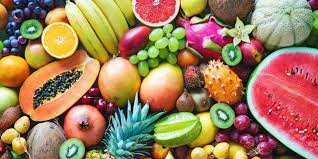


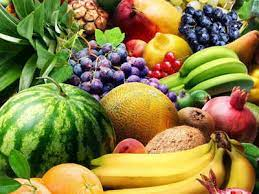


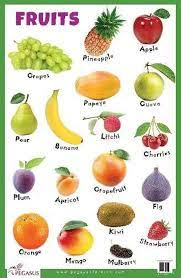


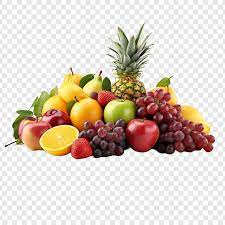

In [124]:
from IPython.display import display, Image
from selenium.webdriver.common.by import By

a = 0
fruits = driver.find_elements(By.XPATH, '//div[@class="fR600b islir"]/img')

for i in fruits:
    if a < 10:
        img_src = i.get_attribute('src')
        display(Image(url=img_src))
    a += 1


In [127]:
driver=webdriver.Chrome()
driver.get('https://images.google.com/')
time.sleep(2)
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys('cars')

In [128]:
search_click=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search_click.click()


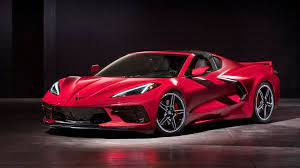


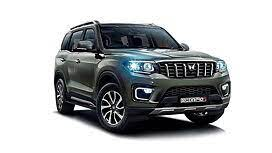


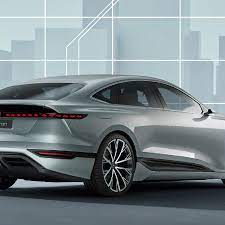


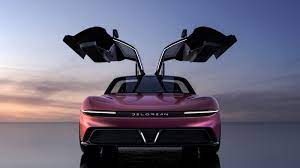


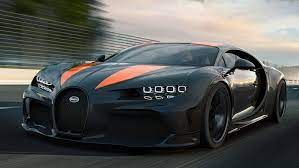


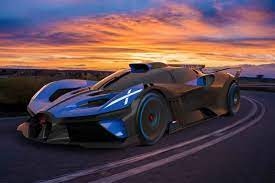


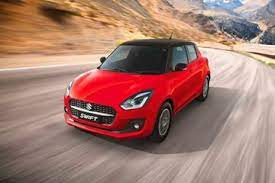


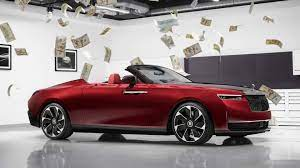


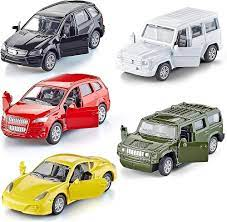


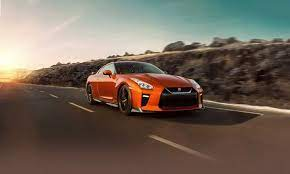

In [130]:
cars=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]/img')
a=0
for i in cars:
    if a<10:
        img_src= i.get_attribute('src')
        display(Image(url=img_src))
    a=a+1
driver.close()

In [131]:
driver=webdriver.Chrome()
driver.get('https://images.google.com/')
time.sleep(2)
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys('machine learning')

In [132]:
search_click=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search_click.click()


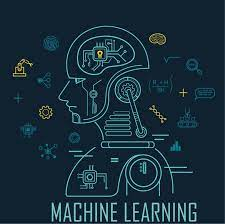


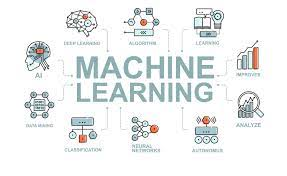


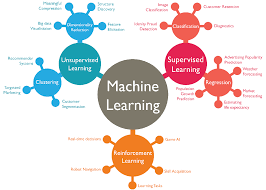


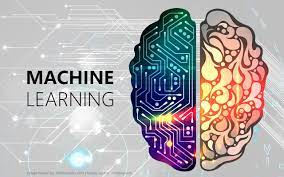


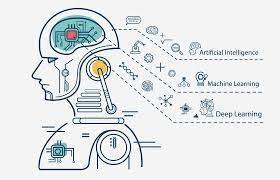


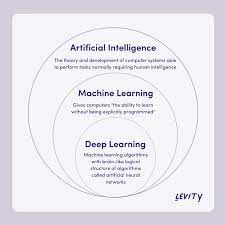


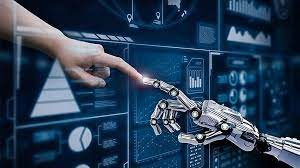


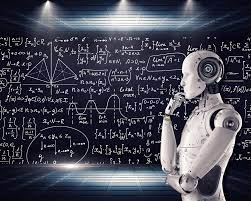


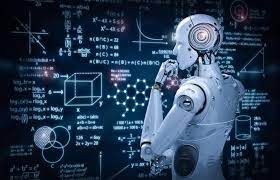


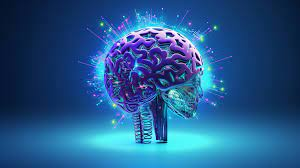

In [133]:
machine_learnig=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]/img')
a=0
for i in machine_learnig:
    if a<10:
        img_src= i.get_attribute('src')
        display(Image(url=img_src))
    a=a+1
driver.close()

In [134]:
driver=webdriver.Chrome()
driver.get('https://images.google.com/')
time.sleep(2)
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys('guitar')

In [136]:
search_click=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search_click.click()


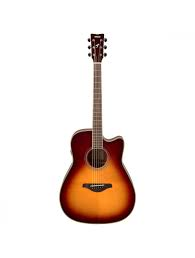


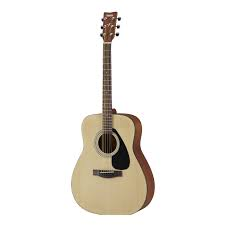


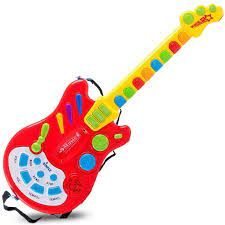


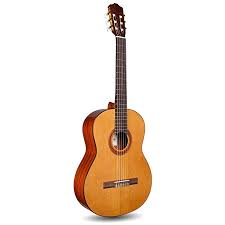


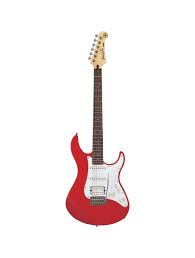


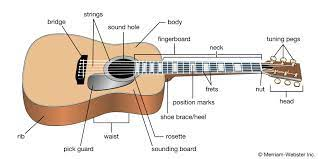


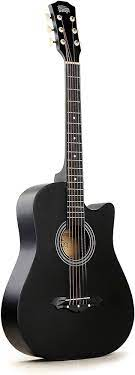


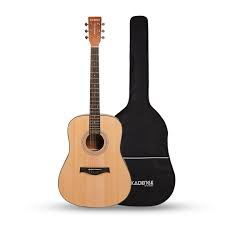


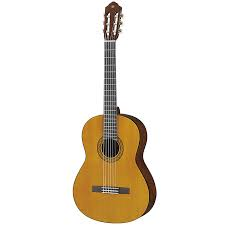


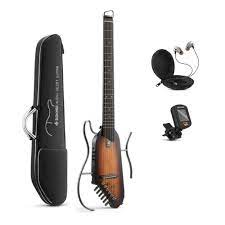

In [137]:
guitar=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]/img')
a=0
for i in guitar:
    if a<10:
        img_src= i.get_attribute('src')
        display(Image(url=img_src))
    a=a+1
driver.close()

In [140]:
driver=webdriver.Chrome()
driver.get('https://images.google.com/')
time.sleep(2)
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys('cakes')

In [141]:
search_click=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search_click.click()


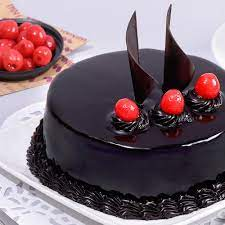


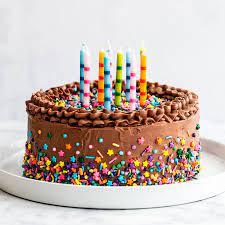


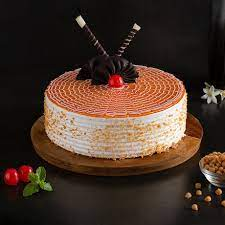


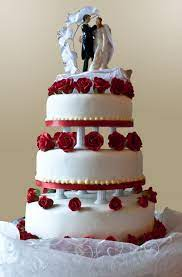


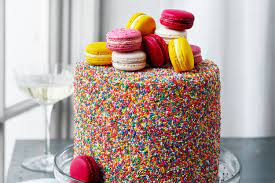


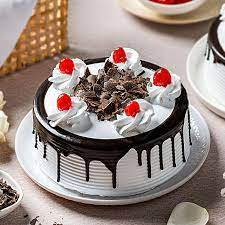


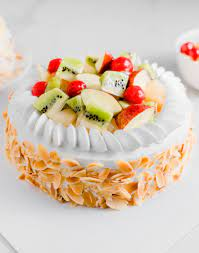


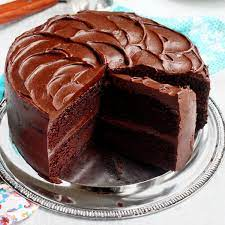


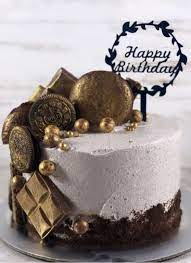


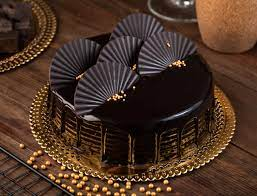

In [142]:
cakes=driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]/img')
a=0
for i in cakes:
    if a<10:
        img_src= i.get_attribute('src')
        display(Image(url=img_src))
    a=a+1
driver.close()

In [143]:
#Question-4

In [230]:
driver= webdriver.Chrome()
driver.get('https://www.flipkart.com/')

In [231]:
search= driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input')

In [232]:
search.send_keys('Oneplus Nord, pixel 4A')

In [233]:
search_click=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button')

In [234]:
search_click.click()

In [235]:
smartphone_name=[]
colour=[]
ram=[]
storage=[]
primary_camera=[]
secondary_camera=[]
display_size=[]
battery_capacity=[]
price=[]
product_url=[]

In [236]:
url=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in url:
    product_url.append(i.get_attribute('href'))
print(len(product_url))

10


In [237]:
#we will use the product url and will scrap the data from the individual sites 
for i in product_url:
    driver.get(i)
    time.sleep(2)
    try:
        phone_name= driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        smartphone_name.append(phone_name.text)
    except NoSuchElementException as e:
        smartphone_name.append('-')
    try:
        color=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        a=color.text
        colour.append(a.split('(')[1].split(',')[0])
    except NoSuchElementException as e:
        colour.append('-')
    try:
        Ram=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        a=Ram.text
        ram.append(a.split('(')[2].split(')')[0])
    except NoSuchElementException as e:
        ram.append('-')
    try:
        Store=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        a=Store.text
        storage.append(a.split('(')[1].split(',')[1].strip())
    except NoSuchElementException as e:
        storage.append('-')
    try:
        pri_cam=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[6]/div[1]/div/div[2]/ul/li[3]').text.split('|')[0]
        primary_camera.append(pri_cam)
    except NoSuchElementException as e:
        primary_camera.append('-')
    try:
        sec_cam=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[6]/div[1]/div/div[2]/ul/li[3]').text.split('|')
        if len(sec_cam)>1:
            secondary_camera.append(sec_cam[1])
        else:
            secondary_camera.append('-')
    except NoSuchElementException as e:
        secondary_camera.append('-')
    try:
        display=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[6]/div[1]/div/div[2]/ul/li[2]')
        display_size.append(display.text)
    except NoSuchElementException as e:
        display_size.append('-')
    try:
        battery= driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[6]/div[1]/div/div[2]/ul/li[4]')
        battery_capacity.append(battery.text)
    except NoSuchElementException as e:
        battery_capacity.append('-')
    try:
        pri=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')
        price.append(pri.text)
    except NoSuchElementException as e:
        price.append('-')

In [238]:
print(len(smartphone_name), len(colour),len(ram),len(storage),len(primary_camera),len(secondary_camera),len(display_size),len(battery_capacity),len(price),len(product_url))

10 10 10 10 10 10 10 10 10 10


In [ ]:
smartphone_name=[]
colour=[]
ram=[]
storage=[]
primary_camera=[]
secondary_camera=[]
display_size=[]
battery_capacity=[]
price=[]
product_url=[]

In [249]:
df=pd.DataFrame({'Name':smartphone_name,'Colour':colour,'Ram':ram,'Storage':storage,'Primary Camera':primary_camera,'Secondary Camera':secondary_camera,'Display Size':display_size,'Battery Capacity':battery_capacity,'Price':price,'Url':product_url})

In [250]:
df

,Name,Colour,Ram,Storage,Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,Url
0,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB) (8...",Bahama Blue,8 GB RAM,128 GB),64MP Rear Camera,-,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹21,780",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
1,"OnePlus Nord (Blue Marble, 64 GB) (6 GB RAM)",Blue Marble,6 GB RAM,64 GB),48MP + 8MP,32MP + 8MP Dual Front Camera,16.36 cm (6.44 inch) Full HD+ Display,4115 mAh Battery,"₹22,980",https://www.flipkart.com/oneplus-nord-blue-mar...
2,"OnePlus Nord (Gray Onyx, 64 GB) (6 GB RAM)",Gray Onyx,6 GB RAM,64 GB),48MP + 8MP,32MP + 8MP Dual Front Camera,16.36 cm (6.44 inch) Full HD+ Display,4115 mAh Battery,"₹22,689",https://www.flipkart.com/oneplus-nord-gray-ony...
3,"OnePlus Nord (Blue Marble, 128 GB) (8 GB RAM)",Blue Marble,8 GB RAM,128 GB),48MP + 8MP,32MP + 8MP Dual Front Camera,16.36 cm (6.44 inch) Full HD+ Display,4115 mAh Battery,-,https://www.flipkart.com/oneplus-nord-blue-mar...
4,"OnePlus Nord (Gray Onyx, 128 GB) (8 GB RAM)",Gray Onyx,8 GB RAM,128 GB),48MP + 8MP,32MP + 8MP Dual Front Camera,16.36 cm (6.44 inch) Full HD+ Display,4115 mAh Battery,"₹24,600",https://www.flipkart.com/oneplus-nord-gray-ony...
5,"OnePlus Nord (Blue Marble, 256 GB) (12 GB RAM)",Blue Marble,12 GB RAM,256 GB),48MP + 8MP,32MP + 8MP Dual Front Camera,16.36 cm (6.44 inch) Full HD+ Display,4115 mAh Battery,"₹21,999",https://www.flipkart.com/oneplus-nord-blue-mar...
6,"OnePlus Nord (Gray Onyx, 256 GB) (12 GB RAM)",Gray Onyx,12 GB RAM,256 GB),48MP + 8MP,32MP + 8MP Dual Front Camera,16.36 cm (6.44 inch) Full HD+ Display,4115 mAh Battery,"₹22,999",https://www.flipkart.com/oneplus-nord-gray-ony...
7,"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB) (8...",Gray Mirror,8 GB RAM,128 GB),-,-,-,-,-,https://www.flipkart.com/oneplus-nord-ce-2-5g-...
8,"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB) (6...",Gray Mirror,6 GB RAM,128 GB),64MP Rear Camera,16MP Front Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,-,https://www.flipkart.com/oneplus-nord-ce-2-5g-...
9,"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB) (6...",Bahama Blue,6 GB RAM,128 GB),64MP Rear Camera,-,16.33 cm (6.43 inch) Display,4500 mAh Battery,-,https://www.flipkart.com/oneplus-nord-ce-2-5g-...


In [251]:
df_csv= df.to_csv(index=False)
print(df_csv)

Name,Colour,Ram,Storage,Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,Url
"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)  (8 GB RAM)",Bahama Blue,8 GB RAM,128 GB),64MP Rear Camera,-,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹21,780",https://www.flipkart.com/oneplus-nord-ce-2-5g-bahama-blue-128-gb/p/itm2a9883679c57c?pid=MOBGJMUH64MTF6PK&lid=LSTMOBGJMUH64MTF6PKNK4ESK&marketplace=FLIPKART&q=Oneplus+Nord%2C+pixel+4A&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=c2d48495-3a61-45a4-ae2d-083fc7783c96.MOBGJMUH64MTF6PK.SEARCH&ppt=hp&ppn=homepage&ssid=iweucvqq740000001708025482282&qH=51e22a8c2f127b5e
"OnePlus Nord (Blue Marble, 64 GB)  (6 GB RAM)",Blue Marble,6 GB RAM,64 GB),48MP + 8MP , 32MP + 8MP Dual Front Camera,16.36 cm (6.44 inch) Full HD+ Display,4115 mAh Battery,"₹22,980",https://www.flipkart.com/oneplus-nord-blue-marble-64-gb/p/itm49f817b591982?pid=MOBFUE5N7KAGZHHC&lid=LSTMOBFUE5N7KAGZHHCUOBN3W&marketplace=FLIPKART&q=Oneplus+Nord%2C+p

In [252]:
#Question-5

In [28]:
chrome_options=Options()
chrome_options.add_argument('--incognito')

In [29]:
driver=webdriver.Chrome()
driver.get('https://www.google.co.in/maps')

In [30]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input')
city=input('enter the city for which you want the longitude and the latitude')
search.send_keys(city)
search_click= driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button')
search_click.click()

enter the city for which you want the longitude and the latitudeGorakhpur, uttar pradesh


In [31]:
current_url= driver.current_url

In [32]:
current_url

'https://www.google.co.in/maps/place/Gorakhpur,+Uttar+Pradesh/@26.7638446,83.3215096,12z/data=!3m1!4b1!4m6!3m5!1s0x3991446a0c332489:0x1ff3f97fdcc6bfa2!8m2!3d26.7605545!4d83.3731675!16zL20vMDRicXZ2?entry=ttu'

In [33]:
longitude_latitude= re.findall('\d+.\d+,\d+.\d+',current_url)

In [34]:
longitude_latitude

['26.7638446,83.3215096']

In [35]:
for i in longitude_latitude:
    longitude_latitude=i

In [36]:
longitude_latitude=longitude_latitude.split(',')

In [37]:
longitude_latitude

['26.7638446', '83.3215096']

In [39]:
print('The longitude of',city,'is',longitude_latitude[0],',','The Latitude of',city, 'is',longitude_latitude[1])

The longitude of Gorakhpur, uttar pradesh is 26.7638446 , The Latitude of Gorakhpur, uttar pradesh is 83.3215096


In [262]:
#Question-6

In [263]:
driver=webdriver.Chrome()
driver.get('https://www.digit.in/')

In [264]:
laptop=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[2]/div/nav/ul/li[2]').click()

In [269]:
best_laptop= driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[2]/div/nav/ul/li[2]/ul/li[3]/ul/li[3]/a').get_attribute('href')

In [271]:
driver.get(best_laptop)

In [272]:
laptop_name=[]
name=driver.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]')
for i in name:
    laptop_name.append(i.text)
print(laptop_name,len(laptop_name))

['HP Victus 16-e0362ax 5th Gen Ryzen 7-5800H (2022)', 'Acer Nitro 5 AN515-45-R3TC Ryzen 5-5600H (2021)', 'Dell New G15-5515 D560804WIN9W Ryzen 5-5600H (2022)', 'HP Pavilion Gaming 15-EC2048AX Ryzen 5-5600X', 'Lenovo Ideapad Gaming 3 82K201RRIN AMD Ryzen 5-5600H (2022)'] 5


In [274]:
product_url=[]
name=driver.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]/a')
for i in name:
    product_url.append(i.get_attribute('href'))
print(product_url,len(product_url))

['https://www.digit.in/laptops/hp-victus-ryzen-7-5800h-2022-price-267139.html', 'https://www.digit.in/laptops/acer-nitro-5-an515-45-r3tc-ryzen-5-5600h-2021-price-295575.html', 'https://www.digit.in/laptops/dell-new-g15-5515-ryzen-5-5600h-2022-price-290451.html', 'https://www.digit.in/laptops/hp-pavilion-gaming-15-ec2048ax-ryzen-5-5600x-2022-price-295589.html', 'https://www.digit.in/laptops/lenovo-ideapad-gaming-3-82k201rrin-amd-ryzen-5-5600h-2022-price-290465.html'] 5


In [275]:
operating_system=[]
for i in product_url:
    driver.get(i)
    time.sleep(2)
    name= driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[1]/div[4]/div[3]/div/div/ul/li[1]/div/p[2]/strong')
    operating_system.append(name.text)

In [276]:
print(operating_system,len(operating_system))

['Windows 11 Home', 'Windows 10 Home', 'Windows 11 Home', 'Windows 10 Home', 'Windows 11 Home'] 5


In [277]:
Display=[]
processor=[]
storage=[]
for i in product_url:
    driver.get(i)
    time.sleep(2)
    name= driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[1]/div[4]/div[3]/div/div/ul/li[4]/div/p[2]/strong')
    Display.append(name.text)
    processorr=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[1]/div[4]/div[3]/div/div/ul/li[2]/div/p[2]/strong')
    processor.append(processorr.text)
    store=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[1]/div[4]/div[3]/div/div/ul/li[3]/div/p[2]/strong')
    storage.append(store.text)
print(Display,len(Display),processor,len(processor),storage,len(storage))

['16.1', '15.6', '15.6', '15.6', '15.6'] 5 ['5th Gen AMD Ryzen 7-5800H', 'AMD Ryzen 5 Hexa Core 5600H', 'AMD Ryzen 5-5600H', 'AMD Ryzen 5-5600X', 'AMD Ryzen 5-5600H'] 5 ['1 TB', '256 GB', '512 GB', '512 GB', '512 GB'] 5


In [278]:
df= pd.DataFrame({'operating system':operating_system,'Display':Display,'Processor':processor,'Storage':storage,'Url':product_url})
df

,operating system,Display,Processor,Storage,Url
0,Windows 11 Home,16.1,5th Gen AMD Ryzen 7-5800H,1 TB,https://www.digit.in/laptops/hp-victus-ryzen-7...
1,Windows 10 Home,15.6,AMD Ryzen 5 Hexa Core 5600H,256 GB,https://www.digit.in/laptops/acer-nitro-5-an51...
2,Windows 11 Home,15.6,AMD Ryzen 5-5600H,512 GB,https://www.digit.in/laptops/dell-new-g15-5515...
3,Windows 10 Home,15.6,AMD Ryzen 5-5600X,512 GB,https://www.digit.in/laptops/hp-pavilion-gamin...
4,Windows 11 Home,15.6,AMD Ryzen 5-5600H,512 GB,https://www.digit.in/laptops/lenovo-ideapad-ga...


In [279]:
#Quesion-7

In [281]:
driver=webdriver.Chrome()
driver.get('https://www.forbes.com/?sh=307611852254')

In [284]:
path_click=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div').click()

In [285]:
billionaires=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[1]').click()

In [286]:
world_billionaires=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]').click()

In [290]:
rank=[]
name=[]
net_worth=[]
age=[]
citizenship=[]
source=[]
industry=[]

In [291]:
for i in range(0,13):
    Rank=driver.find_elements(By.XPATH,'//div[@class="Table_rank___YBhk Table_dataCell__2QCve"]')
    for i in Rank:
        rank.append(i.text)
    next_button=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[1]/button[2]/div/span[1]')
    next_button.click()

In [293]:
for i in range(0,13):
    Name=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][2]')
    for i in Name:
        name.append(i.text)
    Worth=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][3]')
    for i in Worth:
        net_worth.append(i.text)
    Age= driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][4]')
    for i in Age:
        age.append(i.text)
    Citizenship=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][5]')
    for i in Citizenship:
        citizenship.append(i.text)
    Source=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][6]')
    for i in Source:
        source.append(i.text)
    Industry=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][7]')
    for i in Industry:
        industry.append(i.text)
    next_button=driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[1]/button[2]/div/span[1]')
    next_button.click()

In [294]:
Billionaire_df= pd.DataFrame({'Rank':rank,'Name':name,'Net_worth':net_worth,'Age':age,'Citizenship':citizenship,'Source':source,'Industry':industry})
Billionaire_df

,Rank,Name,Net_worth,Age,Citizenship,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2540,Vadim Yakunin,$1.2 B,60,Russia,Pharmacy,Healthcare
2596,2540,Yang Yunyun,$1.2 B,46,China,Retail,Fashion & Retail
2597,2540,Matei Zaharia,$1.2 B,37,Romania,Data analytics,Technology
2598,2540,Zan Shengda,$1.2 B,60,China,Diversified,Diversified


In [302]:
#Question-8

In [3]:
driver=webdriver.Chrome()
driver.get('https://www.youtube.com/')

In [4]:
search=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/form/div[1]/div[1]/input')

In [5]:
search.send_keys('surya kumar yadav 111 vs nz')
search_click= driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/button').click()

In [6]:
video_click= driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div/div[1]/div/h3/a/yt-formatted-string').click()

In [135]:
#first of all we have to scroll down so that we can see all the comments and we can scrap them

In [8]:
for i in range(10000):
    driver.execute_script("window.scrollBy(0,10000)")

In [9]:
comment=[]
upvote=[]
time=[]

In [13]:
for i in driver.find_elements(By.CLASS_NAME,"style-scope ytd-comment-renderer"):
    comment.append(i.text.split('\n')[2])
    time.append(i.text.split('\n')[1])
    upvote.append(i.text.split('\n')[3])
print(len(comment),len(time),len(upvote))

558 558 558


In [14]:
df= pd.DataFrame({'Comment':comment,'Time':time,'Upvote':upvote})

In [15]:
df

,Comment,Time,Upvote
0,Anyone after his Worldcup finals batting,2 months ago,199
1,"He's a monster in t20 cricket , hopefully he c...",5 months ago,911
2,That sliced bat shot over third man to Ferguso...,8 months ago,1.3K
3,Surya Kumar Yadav Best 3 Innings In T20I,7 months ago,1st 117* Vs England 󠁧󠁢󠁥󠁮󠁧󠁿
4,Surya is one of the greatest T20 batsman in th...,8 months ago (edited),1.4K
...,...,...,...
553,1st century 117 against England in England 2n...,23 hours ago,Reply
554,वा सुर्या दादा,3 months ago,Reply
555,surtakumary,8 months ago,Reply
556,360°,5 months ago,1


In [311]:
#Question-9

In [3]:
driver= webdriver.Chrome()
driver.get('https://www.hostelworld.com/')

In [4]:
city_info=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input')

In [5]:
city_info.send_keys('london')

In [6]:
city_click=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button').click()

In [7]:
search_click=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[1]').click()

In [78]:
Name=[]
Distance=[]
Ratings=[]
Total_review=[]
overall_review=[]
privates_from_price=[]
facilities=[]
property_description=[]
url=[]

In [79]:
for i in range(3):
    a=driver.find_elements(By.XPATH,'//div[@class="property-name"]')
    for i in a:
        Name.append(i.text)
    try:
        next_button=driver.find_element(By.CSS_SELECTOR, '.pill-content.page-nav.nav-right.icon-only').click()
    except:
        next_button=driver.find_element(By.CSS_SELECTOR, '.pill-content.page-nav.nav-right.icon-only').click()
    time.sleep(2)
print(Name,len(Name))

["Wombat's City Hostel London", 'Palmers Lodge - Swiss Cottage', "St Christopher's Village", "Wombat's City Hostel London", 'Palmers Lodge - Swiss Cottage', "St Christopher's Village", 'NX London Hostel', 'Urbany Hostel London', 'Onefam Notting Hill', 'Generator London', 'Onefam Waterloo', 'Astor Hyde Park', 'Safestay London Elephant & Castle', 'Astor Museum Inn', 'No.8 Seven Sisters', 'Clink261', 'No.8 Willesden Hostel London', 'Smart Russell Square Hostel', 'Safestay London Kensington Holland Park', 'The Walrus Hostel', 'Smart Hyde Park Inn Hostel', 'YHA London Oxford Street', 'Queen Elizabeth Chelsea', 'Destinations Hostels @ The Gallery', 'Prime Backpackers Angel', 'Hostelle - women only hostel London', 'London Backpackers', 'Smart Camden Inn Hostel', 'Kabannas London St Pancras', 'Astor Kensington', "St Christopher's Inn - London Bridge", 'Astor Victoria', "St Christopher's Hammersmith", 'Phoenix Hostel', 'Barmy Badger Backpackers', "St Christopher's Camden", "St Christopher's She

In [84]:
for i in range(3):
    a=driver.find_elements(By.XPATH,'//div[@class="property-card"]/a')
    for i in a:
        url.append(i.get_attribute('href'))
    try:
        next_button=driver.find_element(By.CSS_SELECTOR, '.pill-content.page-nav.nav-right.icon-only').click()
    except:
        next_button=driver.find_element(By.CSS_SELECTOR, '.pill-content.page-nav.nav-right.icon-only').click()
    time.sleep(2)
print(url,len(url))

['https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s-City-Hostel-London/London/88047?from=2024-02-17&to=2024-02-20&guests=2', 'https://www.hostelworld.com/pwa/hosteldetails.php/Palmers-Lodge-Swiss-Cottage/London/14348?from=2024-02-17&to=2024-02-20&guests=2', 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2024-02-17&to=2024-02-20&guests=2', 'https://www.hostelworld.com/pwa/hosteldetails.php/Wombat-s-City-Hostel-London/London/88047?from=2024-02-17&to=2024-02-20&guests=2', 'https://www.hostelworld.com/pwa/hosteldetails.php/Palmers-Lodge-Swiss-Cottage/London/14348?from=2024-02-17&to=2024-02-20&guests=2', 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2024-02-17&to=2024-02-20&guests=2', 'https://www.hostelworld.com/pwa/hosteldetails.php/NX-London-Hostel/London/15204?from=2024-02-17&to=2024-02-20&guests=2', 'https://www.hostelworld.com/pwa/hosteldetails.php/Urbany-Hostel-London/London/303427?fro

In [85]:
for i in url:
    driver.get(i)
    try:
        a=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[4]/div/div[1]/div/div/button')
        Distance.append(a.text)
    except:
        Distance.append('-')
    try:
        a=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[8]/div/div[1]/div[1]/div[1]')
        Ratings.append(a.text)
    except:
        Ratings.append('-')
    try:
        a=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[8]/div/div[1]/div[1]/div[2]/div[2]')
        Total_review.append(a.text)
    except:
        Total_review.append('-')
    try:
        a=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[8]/div/div[1]/div[1]/div[2]/div[1]')
        overall_review.append(a.text)
    except:
        overall_review.append('-')
    try:
        a=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[8]/div/div[1]/div[2]/div/div[1]/span[2]')
        privates_from_price.append(a.text)
    except:
        privates_from_price.append('-')
    try:
        a=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[12]/div/ul/li[1]/ul')
        facilities.append(a.text)
    except:
        facilities.append('-')
    try:
        a=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[8]/div/div[2]/div[3]/div/div[2]')
        property_descriptiona.append(a.text)
    except:
        property_description.append('-')
    time.sleep(2)
print(len(Name),len(Distance),len(Ratings),len(Total_review),len(overall_review),len(privates_from_price),len(facilities),len(property_description),len(url))

79 79 79 79 79 79 79 79 79


In [87]:
Hostel_df= pd.DataFrame({'Name':Name,'Distance':Distance,'Ratings':Ratings,'Total_review':Total_review,'Overall_review':overall_review,'privates_from_price':privates_from_price,'Facilities':facilities,'Property_description':property_description,'Url':url})

In [90]:
Hostel_df

,Name,Distance,Ratings,Total_review,Overall_review,privates_from_price,Facilities,Property_description,Url
0,Wombat's City Hostel London,"7 Dock Street,",9.1,15924 Total Reviews,Superb,Perfect Location,Linen Included Free City Maps Free WiFi Free I...,-,https://www.hostelworld.com/pwa/hosteldetails....
1,Palmers Lodge - Swiss Cottage,"40 College Crescent, Swiss Cottage,",8.8,15982 Total Reviews,Fabulous,Perfect Location,Linen Included Free WiFi Free Internet Access,-,https://www.hostelworld.com/pwa/hosteldetails....
2,St Christopher's Village,"165 Borough High Street,",7.8,12880 Total Reviews,Very Good,Perfect Location,Linen Included Free WiFi Free Internet Access,-,https://www.hostelworld.com/pwa/hosteldetails....
3,Wombat's City Hostel London,"7 Dock Street,",9.1,15924 Total Reviews,Superb,Perfect Location,Linen Included Free City Maps Free WiFi Free I...,-,https://www.hostelworld.com/pwa/hosteldetails....
4,Palmers Lodge - Swiss Cottage,"40 College Crescent, Swiss Cottage,",8.8,15982 Total Reviews,Fabulous,Perfect Location,Linen Included Free WiFi Free Internet Access,-,https://www.hostelworld.com/pwa/hosteldetails....
...,...,...,...,...,...,...,...,...,...
74,Aron Guest House,"27 South Ealing,",2.0,27 Total Reviews,Rating,-,Free Parking Towels Included Free WiFi,-,https://www.hostelworld.com/pwa/hosteldetails....
75,The Dover,"44 Belgrave Road,",No Rating\n0 Total Reviews,-,-,-,-,-,https://www.hostelworld.com/pwa/hosteldetails....
76,Park Hotel Essex,"327 Cranbrook Road, Ilford,",No Rating\n0 Total Reviews,-,-,-,Free Parking,-,https://www.hostelworld.com/pwa/hosteldetails....
77,Wellesley Hotel,"17, Wellesley Rd Ilford,",No Rating\n0 Total Reviews,-,-,-,-,-,https://www.hostelworld.com/pwa/hosteldetails....
